In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Base de datos : Internet

### Exploración preliminar de los datos

In [3]:
dfs = pd.ExcelFile('Internet.xlsx').sheet_names # Para explorar cuantas hojas tiene el dataset
dfs

['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por rango',
 'Accesos por rangos',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

In [4]:
test = pd.read_excel('Internet.xlsx', sheet_name='Acc_vel_loc_sinrangos') # Para explorar las columnas
test.head()

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


Cuento con una base datos de telecomunicaiones con 15 hojas que contienen diferentes tipos de información; una vez visualizada cada una de las hojas he decidido trabajar con las siguientes. 

1. Velocidad_sin_Rangos: Esta hoja parece contener información detallada sobre las velocidades de conexión a internet. Entender la distribución y variabilidad de las velocidades es crucial para el análisis, ya que la velocidad de conexión impacta directamente en la calidad del servicio.
2. Totales Accesos Por Tecnología: Para entender el panorama general de los tipos de tecnología que predominan en el acceso a internet.
3. Acc_vel_loc_sinrangos: Proporciona datos sobre el acceso por localidad, lo que te permitirá explorar cómo varía el acceso a internet en diferentes regiones.
4. Velocidad % por prov: Esta hoja ofrece un desglose porcentual de las velocidades por provincia, lo que es útil para identificar desigualdades regionales en el acceso a internet.
5. Totales VMD: Los totales de velocidad media descargada (VMD) son un indicador clave del rendimiento de la red.
6. Penetración-poblacion y Penetracion-hogares: Estas hojas ofrecen una visión de la penetración del internet en la población y en los hogares, fundamentales para entender la accesibilidad y adopción del servicio.
7. Ingresos: Esta hoja proporciona los datos principales sobre los ingresos generados por los servicios de internet.

### Velocidad sin Rangos

Objetivos del EDA:
- Analizar la distribución de velocidades.
- Identificar valores atípicos.
- Buscar patrones temporales.

In [5]:
df_velocidad_sin_rangos = pd.read_excel('Internet.xlsx', sheet_name='Velocidad_sin_Rangos')
df_velocidad_sin_rangos.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


#### He observado que los nombres de las provincias no tienen un estandar, los cambio todos a mayusculas y tambien les quito las tildes. 

In [6]:
df_velocidad_sin_rangos['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN',
       'Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [7]:
df_velocidad_sin_rangos['Provincia'] = df_velocidad_sin_rangos['Provincia'].apply(lambda x: x.upper())

In [8]:
import unicodedata

def quitar_tildes(texto):
    return ''.join((c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn'))

df_velocidad_sin_rangos = df_velocidad_sin_rangos.applymap(lambda x: quitar_tildes(str(x)) if isinstance(x, str) else x)

C:\Users\anavi\AppData\Local\Temp\ipykernel_19796\1282124229.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_velocidad_sin_rangos = df_velocidad_sin_rangos.applymap(lambda x: quitar_tildes(str(x)) if isinstance(x, str) else x)


In [9]:
df_velocidad_sin_rangos['Provincia'].unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN',
       'CAPITAL FEDERAL'], dtype=object)

In [10]:
df_velocidad_sin_rangos.describe()

,Año,Trimestre,Velocidad,Accesos
count,18884.000000,18884.000000,18874.000000,1.888400e+04
mean,2021.017104,2.477653,96.171156,1.412328e+04
std,1.919740,1.126947,379.722905,6.856387e+04
min,2017.000000,1.000000,0.000000,0.000000e+00
25%,2019.000000,1.000000,4.000000,2.600000e+01
50%,2021.000000,2.000000,12.300000,6.725000e+02
75%,2023.000000,4.000000,50.100000,6.114000e+03
max,2024.000000,4.000000,10000.000000,1.346370e+06


In [11]:
df_velocidad_sin_rangos.isnull().sum() # Para identificar si hay valores nulos

Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64

In [12]:
df_velocidad_sin_rangos[df_velocidad_sin_rangos['Velocidad'].isnull()] # Para visualizar los valores nulos

,Año,Trimestre,Provincia,Velocidad,Accesos
1155,2024,1,CORDOBA,NaN,1
1644,2024,1,SANTA FE,NaN,9
3753,2023,2,CORDOBA,NaN,1
4239,2023,2,SANTA FE,NaN,9
6303,2022,3,CORDOBA,NaN,1
6785,2022,3,SANTA FE,NaN,9
9255,2021,3,BUENOS AIRES,NaN,4
10031,2021,2,BUENOS AIRES,NaN,4
10794,2021,1,BUENOS AIRES,NaN,4
11538,2020,4,BUENOS AIRES,NaN,4


In [13]:
df_velocidad_sin_rangos = df_velocidad_sin_rangos.dropna(subset=['Velocidad']) # Para eliminar valores nulos

In [14]:
df_velocidad_sin_rangos[df_velocidad_sin_rangos.isnull().any(axis=1)] # Para saber cuales son estos valores nulos

,Año,Trimestre,Provincia,Velocidad,Accesos


In [15]:
df_velocidad_sin_rangos = df_velocidad_sin_rangos.dropna() # Para eliminar las filas con valores nulos

In [16]:
# Quiero identificar valores duplicados
duplicados = df_velocidad_sin_rangos.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")

if duplicados > 0:
    print("Registros duplicados:")
    print(df_velocidad_sin_rangos[df_velocidad_sin_rangos.duplicated()])

Total de registros duplicados: 0


In [17]:
# Quiero agrupar por Velocidad, Provincia y Trimestre, y sumar los Accesos
sumary_df = df_velocidad_sin_rangos.groupby(['Provincia', 'Año', 'Velocidad'])['Accesos'].sum().reset_index()
sumary_df.head()

,Provincia,Año,Velocidad,Accesos
0,BUENOS AIRES,2017,0.256,114182
1,BUENOS AIRES,2017,0.512,3865
2,BUENOS AIRES,2017,1.000,35185
3,BUENOS AIRES,2017,1.200,19861
4,BUENOS AIRES,2017,2.200,29124


In [18]:
# Quiero determinar cual fue la velocidad maxima alcanzada en cada año para cada provincia (no tomo en cuenta 
# promedios porque se alteran los valores significativamente)
tabla_velocidad = sumary_df.pivot_table(index='Provincia', columns='Año', values='Velocidad', aggfunc='max')
tabla_velocidad.head()


Año,2017,2018,2019,2020,2021,2022,2023,2024
Provincia,,,,,,,,
BUENOS AIRES,155.0,155.0,1536.0,7000.0,8000.0,1024.0,1024.0,1024.0
CABA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0
CAPITAL FEDERAL,155.0,155.0,1024.0,7000.0,1075.0,1024.0,1024.0,1024.0
CATAMARCA,155.0,155.0,512.0,5000.0,5000.0,1024.0,1024.0,1024.0
CHACO,155.0,155.0,512.0,7000.0,8000.0,1024.0,1024.0,1024.0


In [19]:
tabla_velocidad.max()

Año
2017      155.0
2018      155.0
2019     1536.0
2020    10000.0
2021    10000.0
2022     5000.0
2023     5000.0
2024     5000.0
dtype: float64

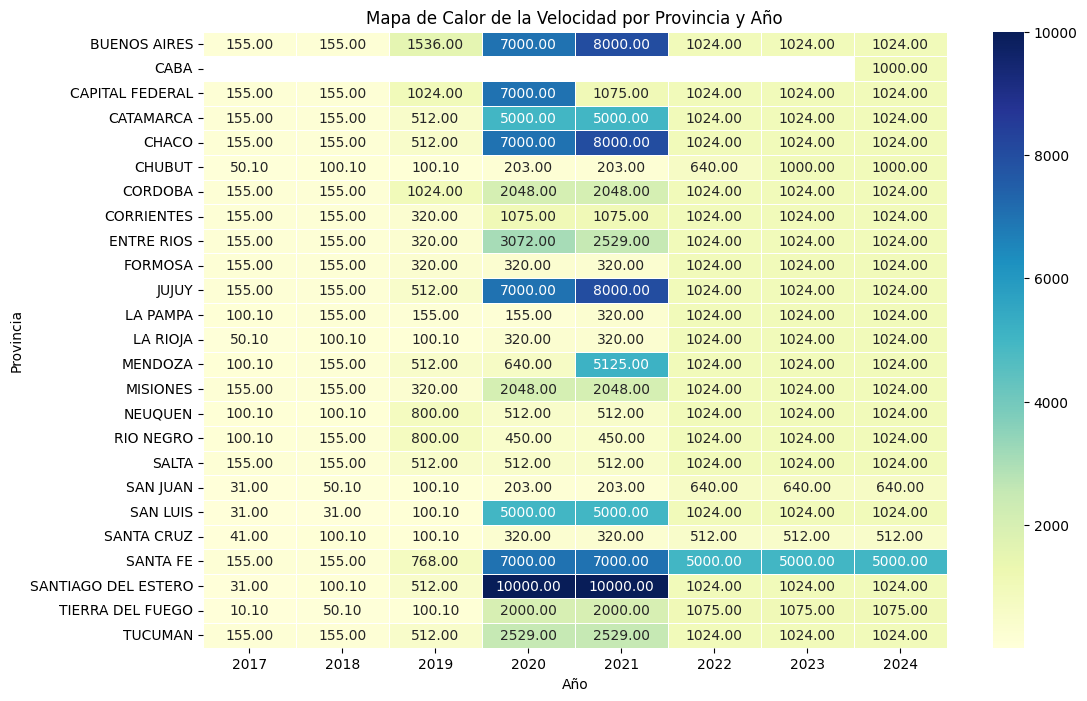

In [20]:
# Quiero crear un mapa de calor que me permita ver más facilmente las velocidades alcanzadas para cada año 
# de la decada, por provincia. 
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_velocidad, annot=True, cmap='YlGnBu', cbar=True, fmt='.2f', linewidths=0.5)

plt.title('Mapa de Calor de la Velocidad por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Provincia')
plt.show()

De esta gráfica puedo concluir que entre el año 2020 y 2021 hubo un comportamiento atipico, dado que las velocidades maximas alcanzadas en cada provincia fueron, en algunas localidades, las más altas registradas pero durante los siguientes años se normalizaron. Por ejemplo: en Santiago del Fuego la velocidad maxima alcanzada fue de 10.000 entre 2020 y 2021, pero para 2023 la velocidad maxima fue de 1.024, velocidad que se mantiene hasta 2024. 

In [21]:
# Quiero un poco de información más especifica sobre los valore atipicos. 
Q1 = tabla_velocidad.quantile(0.25, axis=1)
Q3 = tabla_velocidad.quantile(0.75, axis=1)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = tabla_velocidad.copy()

for columna in tabla_velocidad.columns:
    valores_atipicos[columna] = tabla_velocidad.apply(
        lambda row: row[columna] if limite_inferior[row.name] <= row[columna] <= limite_superior[row.name] else 'Atípico',
        axis=1
    )

valores_atipicos


Año,2017,2018,2019,2020,2021,2022,2023,2024
Provincia,,,,,,,,
BUENOS AIRES,155.0,155.0,1536.0,Atípico,Atípico,1024.0,1024.0,1024.0
CABA,Atípico,Atípico,Atípico,Atípico,Atípico,Atípico,Atípico,1000.0
CAPITAL FEDERAL,Atípico,Atípico,1024.0,Atípico,1075.0,1024.0,1024.0,1024.0
CATAMARCA,155.0,155.0,512.0,Atípico,Atípico,1024.0,1024.0,1024.0
CHACO,155.0,155.0,512.0,Atípico,Atípico,1024.0,1024.0,1024.0
CHUBUT,50.1,100.1,100.1,203.0,203.0,640.0,1000.0,1000.0
CORDOBA,155.0,155.0,1024.0,Atípico,Atípico,1024.0,1024.0,1024.0
CORRIENTES,155.0,155.0,320.0,1075.0,1075.0,1024.0,1024.0,1024.0
ENTRE RIOS,155.0,155.0,320.0,3072.0,2529.0,1024.0,1024.0,1024.0


En este caso no elimino los valores atipicos porque arrojan información importante, a pesar de que no son una tendencia que se prolongue pero en adelante si me interesa ver una tendencia. 

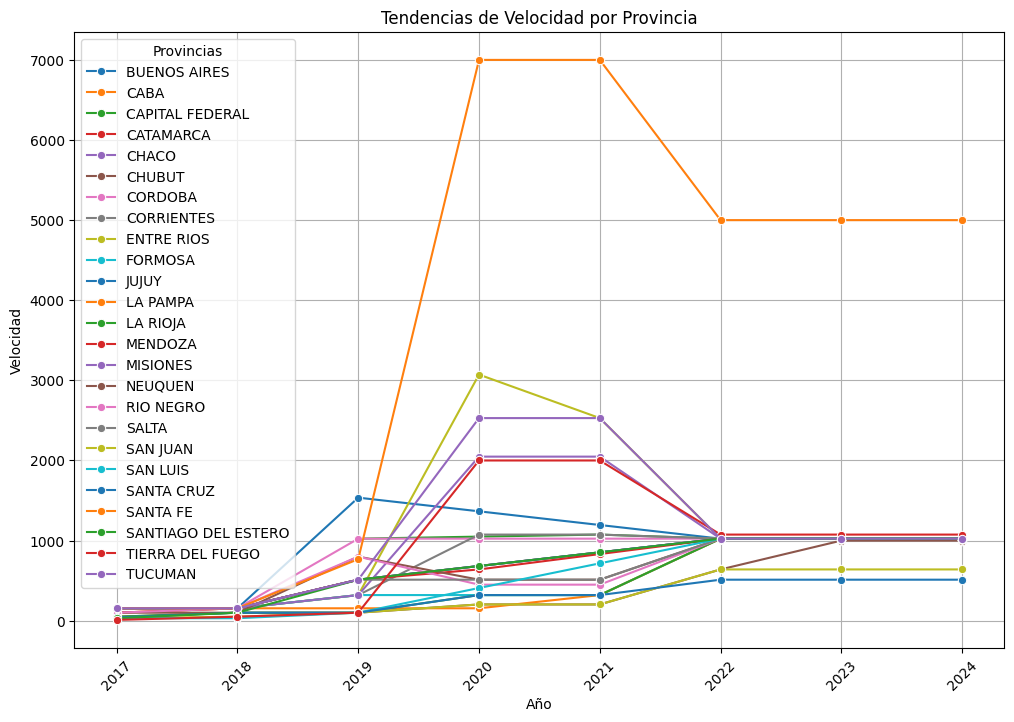

In [22]:
tabla_sin_atipicos = valores_atipicos.replace('Atípico', None).astype(float)
todos_los_años = pd.Index(range(2017, 2025))
tabla_sin_atipicos = tabla_sin_atipicos.reindex(columns=todos_los_años, fill_value=None)
tabla_sin_atipicos = tabla_sin_atipicos.interpolate(axis=1, method='linear')

plt.figure(figsize=(12, 8))
for provincia in tabla_sin_atipicos.index:
    datos_provincia = tabla_sin_atipicos.loc[provincia]
    sns.lineplot(x=datos_provincia.index, y=datos_provincia.values, marker='o', label=provincia)
plt.title('Tendencias de Velocidad por Provincia')
plt.xlabel('Año')
plt.ylabel('Velocidad')
plt.xticks(todos_los_años, rotation=45)
plt.grid(True)
plt.legend(title='Provincias')
plt.show()


La gráfica presenta una tendencia clara, entre 2019 y 2021 hubo altos niveles de velocidades pero a partir de 2022 estos valores empezaron a estandarizarse. Podria pensarse que fue una etapa de exploración para finalmente definiir la velocidad de 1024 como el estandar, dado que se mantuvo igual hasta el año pasado. 

### Total Accesos por Tecnología: 

Objetivos del EDA:
- Identificar la tecnología más utilizada.
- Explorar tendencias en la adopción de diferentes tecnologías.

In [23]:
df_accesos = pd.read_excel('Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')
df_accesos.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [24]:
df_accesos.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,42.000000,42.000000,4.200000e+01
mean,2018.761905,2.452381,2.694844e+06,4.433906e+06,1.224694e+06,304293.214286,158186.071429,8.815923e+06
std,3.074756,1.130560,1.094347e+06,1.319783e+06,1.321136e+06,203202.399993,82363.507846,1.733189e+06
min,2014.000000,1.000000,7.334910e+05,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.250000,1.730869e+06,3.146292e+06,1.719410e+05,85390.500000,70430.000000,7.218131e+06
50%,2019.000000,2.000000,3.061623e+06,4.535507e+06,6.989465e+05,292223.000000,185221.000000,8.720658e+06
75%,2021.000000,3.000000,3.713298e+06,5.857192e+06,1.945689e+06,515434.000000,244069.500000,1.038873e+07
max,2024.000000,4.000000,3.803024e+06,6.073426e+06,4.169958e+06,598682.000000,265328.000000,1.163316e+07


In [25]:
# Valores faltantes
df_accesos.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [26]:
# Quiero identificar valores duplicados
duplicados = df_accesos.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")

if duplicados > 0:
    print("Registros duplicados:")
    print(df_accesos[df_accesos.duplicated()])

Total de registros duplicados: 0


Quiero hacer una gráfica de la cantidad de conexiones a internet existentes, para identificar las tendencias en el uso de los diferentes tipos de tecnologias existentes. Esto para obtener una visión general de cómo están distribuidos los accesos a internet según la tecnología, con el fin de tener una base sólida sobre el panorama tecnológico.

<Figure size 1200x600 with 0 Axes>

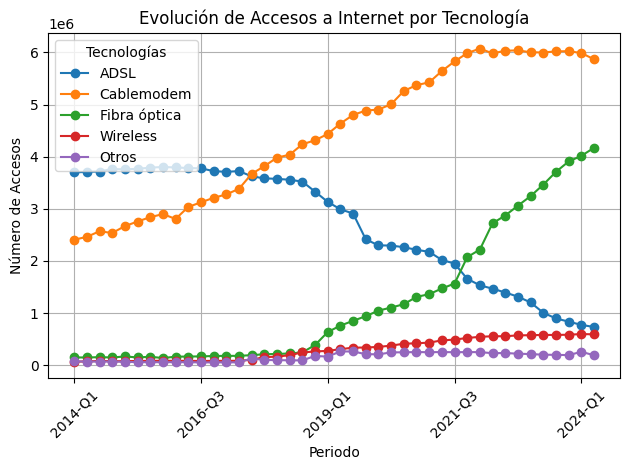

In [27]:
df_accesos['Periodo'] = df_accesos['Año'].astype(str) + '-Q' + df_accesos['Trimestre'].astype(str)  # Periodo en índice
df_accesos.sort_values(by=['Año', 'Trimestre'], inplace=True)  # Corregir orden cronológico
df_accesos.set_index('Periodo', inplace=True)  # Establecer el índice en la columna 'Periodo'
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_accesos = df_accesos.drop_duplicates(subset=tecnologias)

# Grafica
plt.figure(figsize=(12, 6))
df_accesos[tecnologias].plot(kind='line', marker='o')
plt.title('Evolución de Accesos a Internet por Tecnología')
plt.xlabel('Periodo')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=45)
plt.legend(title='Tecnologías')
plt.grid(True)
plt.tight_layout()
plt.show()


Se puede observar que en un intervalo de los ultimos 10 años ha habido un incremento considerable en el uso de los siguientes: 
1. *"Cablemodem"* el cual ya existia en 2014. Este, en esta epoca alcanzaba los 2.4 millones de conexiones y para 2024 alcanzo las 5.8 millones de conexiones. 
2. *"Fibra optica"* no existia en 2014 y a alcanzado un total de conexiones de 4.1 millones, es el que ha tenido el crecimiento más representativo. 

Por otro lado, el uso de la tecnologia *"ADSL"* se ha reducido considerablemente. Ha pasado de tener 3.7 millones de conexiones en promedio de 2014 a solo un promedio de 753 mil en 2024. El uso de "Wireles" y "Otros" no es representativo. 

### Acceso velocidad local sin Rangos

Objetivos del EDA:
- Identificar diferencias regionales en acceso.
- Detectar localidades con acceso limitado o excepcional.
- Examinar la correlación entre acceso y velocidad.

In [28]:
df_vel_loc_sin_rangos = pd.read_excel('Internet.xlsx', sheet_name='Acc_vel_loc_sinrangos')
df_vel_loc_sin_rangos.head()


,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [29]:
# Renombrar las columnas según las indicaciones proporcionadas
df_vel_loc_sin_rangos = df_vel_loc_sin_rangos.rename(columns={
    'Partido': 'Provincia',
    'Localidad': 'Partido',
    'link Indec': 'Localidad',
    'Velocidad (Mbps)': 'link Indec',
    'Provincia': 'Velocidad (Mbps)'})

In [30]:
df_vel_loc_sin_rangos.head()

,Provincia,Partido,Localidad,link Indec,Velocidad (Mbps),Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [31]:
df_vel_loc_sin_rangos.shape

(18864, 6)

In [32]:
df_vel_loc_sin_rangos.describe()

,Velocidad (Mbps),Accesos
count,18864.000000,18857.000000
mean,66.866042,612.828499
std,178.987138,6283.359677
min,0.000000,-5582.000000
25%,3.000000,3.000000
50%,10.000000,26.000000
75%,30.000000,180.000000
max,1024.000000,576789.000000


In [33]:
df_vel_loc_sin_rangos.isnull().sum()

Provincia           0
Partido             0
Localidad           1
link Indec          0
Velocidad (Mbps)    0
Accesos             7
dtype: int64

In [34]:
df_vel_loc_sin_rangos = df_vel_loc_sin_rangos.dropna()

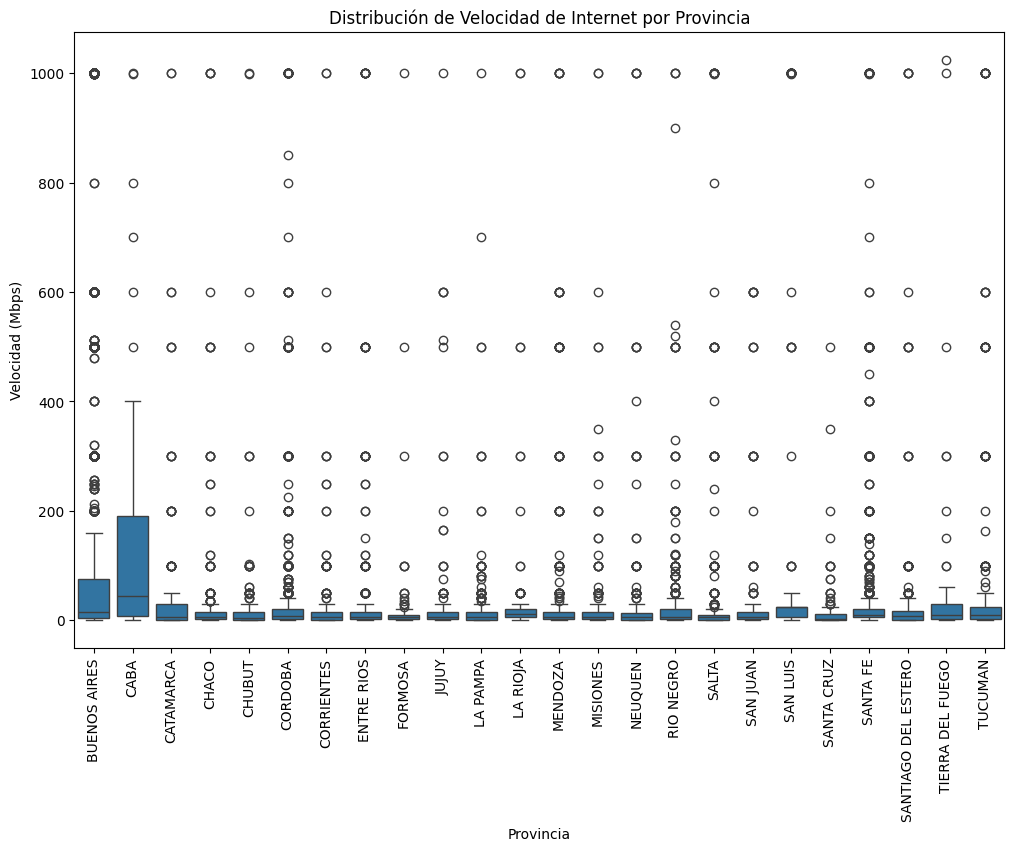

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Provincia', y='Velocidad (Mbps)', data=df_vel_loc_sin_rangos)
plt.title('Distribución de Velocidad de Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad (Mbps)')
plt.xticks(rotation=90)
plt.show()

Este gráfico permite visualizar la variación de la velovidad del internet entre las diferentes provincias. De acuerdo con la información arrojada por las otras hojas estudiadas, se puede ver que el promedio actual de 1000 en velocidad se ha superado por mucho al promedio de la velocidad presentada en los años del periodo estudiado (2014 a 2024)

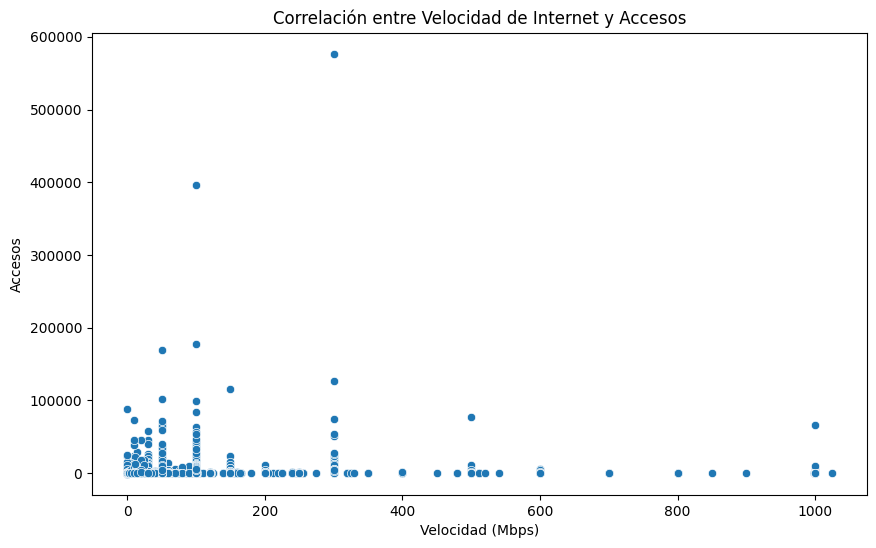

In [36]:
# Correlación entre Velocidad (Mbps) y Accesos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Velocidad (Mbps)', y='Accesos', data=df_vel_loc_sin_rangos)
plt.title('Correlación entre Velocidad de Internet y Accesos')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Accesos')
plt.show()

Se puede ver que no hay correlación entre el numero de accesos y la velocidad del internet. 

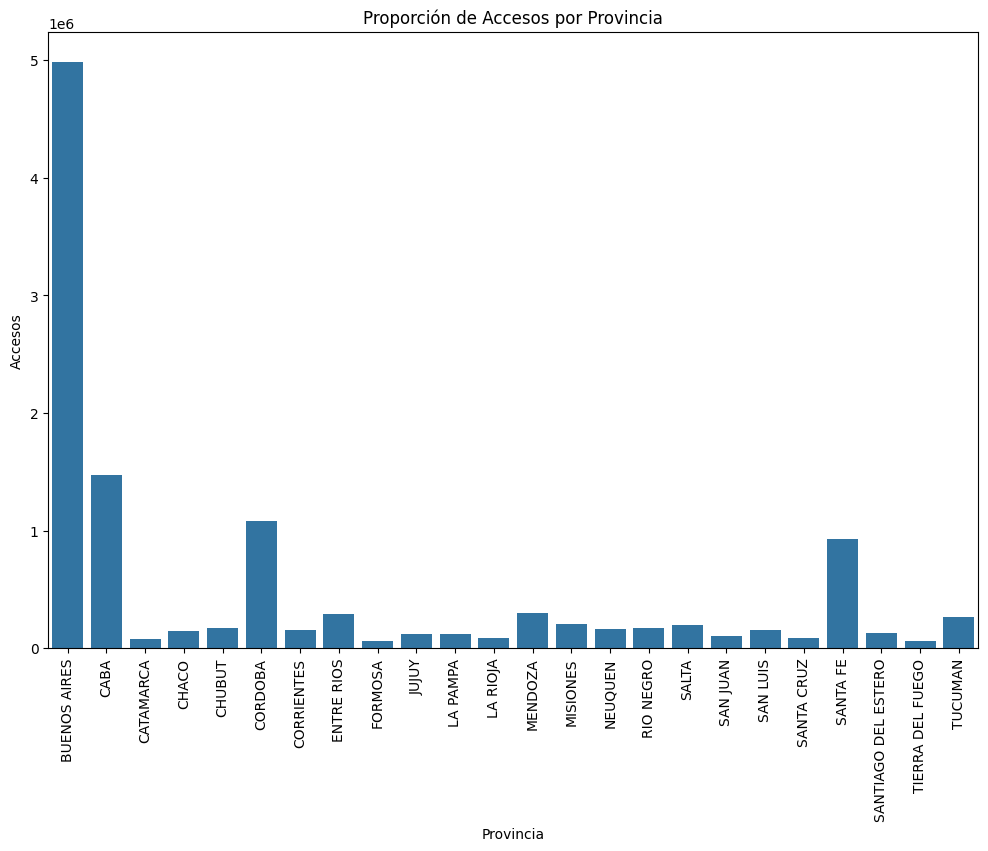

In [37]:
accesos_por_provincia = df_vel_loc_sin_rangos.groupby('Provincia')['Accesos'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='Accesos', data=accesos_por_provincia)
plt.title('Proporción de Accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.show()

COmo se puede observar en la gráfica, la provincia que tiene mayor cantidad de accesos es Buenos Aires, seguida de Caba, Cordobá y Santa fé.

### Velocidad Promedio por Provincia: 

Objetivos del EDA:
- Comparar la distribución de velocidades entre provincias.
- Detectar provincias con mejores o peores niveles de servicio.

In [38]:
df_velocidad = pd.read_excel('Internet.xlsx', sheet_name='Velocidad % por prov')
df_velocidad = df_velocidad.drop_duplicates()
df_velocidad.tail()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
1003,2014,1,Santa Cruz,3.315991
1004,2014,1,Santa Fe,3.147407
1005,2014,1,Santiago Del Estero,2.949472
1006,2014,1,Tierra Del Fuego,3.446888
1007,2014,1,Tucumán,3.208342


In [39]:
df_velocidad.isnull().sum() # Para identificar si hay valores nulos

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [40]:
df_velocidad['Provincia'].unique() # Quiero saber como estan los nombres para estandarizar a los de arriba. 

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [41]:
df_velocidad['Provincia'] = df_velocidad['Provincia'].apply(lambda x: x.upper()) # Pasar nombres en mayusculas

In [42]:
import unicodedata #Para quitar tildes de los nombre

def quitar_tildes(texto):
    return ''.join((c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn'))

df_velocidad = df_velocidad.applymap(lambda x: quitar_tildes(str(x)) if isinstance(x, str) else x)

C:\Users\anavi\AppData\Local\Temp\ipykernel_19796\3497815405.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_velocidad = df_velocidad.applymap(lambda x: quitar_tildes(str(x)) if isinstance(x, str) else x)


In [43]:
df_velocidad['Provincia'].unique() # confirmo que todos los nombres son correctos

array(['BUENOS AIRES', 'CAPITAL FEDERAL', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CORDOBA', 'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY',
       'LA PAMPA', 'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN',
       'RIO NEGRO', 'SALTA', 'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ',
       'SANTA FE', 'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'],
      dtype=object)

In [44]:
df_velocidad.shape


(1008, 4)

In [45]:
# Función para identificar outliers usando el método IQR
def identificar_outliers(grupo):
    Q1 = grupo.quantile(0.25)
    Q3 = grupo.quantile(0.75)
    IQR = Q3 - Q1
    # Crear una máscara para identificar los outliers
    outliers = (grupo < (Q1 - 1.5 * IQR)) | (grupo > (Q3 + 1.5 * IQR))
    return outliers

# Crear una copia del DataFrame para trabajar
df_velocidad_outliers = df_velocidad.copy()

# Identificar outliers en la columna 'Mbps (Media de bajada)' agrupando por 'Provincia' y 'Año'
df_velocidad_outliers['Mbps_outlier'] = df_velocidad_outliers.groupby(['Provincia', 'Año'])['Mbps (Media de bajada)'].transform(identificar_outliers)

# Filtrar solo las filas que son outliers
outliers_df = df_velocidad_outliers[df_velocidad_outliers['Mbps_outlier']]

# Seleccionar las columnas relevantes
outliers_df = outliers_df[['Provincia', 'Año', 'Trimestre', 'Mbps (Media de bajada)']]

outliers_df

,Provincia,Año,Trimestre,Mbps (Media de bajada)
66,SAN LUIS,2023,4,174.590000
67,SANTA CRUZ,2023,4,36.770000
142,TIERRA DEL FUEGO,2023,1,14.580000
144,BUENOS AIRES,2022,4,111.000000
145,CAPITAL FEDERAL,2022,4,182.860000
...,...,...,...,...
925,MISIONES,2014,4,4.025620
928,SALTA,2014,4,3.862259
933,SANTIAGO DEL ESTERO,2014,4,3.458224
935,TUCUMAN,2014,4,3.860612


Es necesario eliminar los outliers porque se veria afectado el promedio de la velocidad de bajada significativamente. Los elimino y trabajo con el nuevo dataframe creado. 

In [46]:
# Filtrar las filas que NO son outliers
df_sin_outliers = df_velocidad_outliers[~df_velocidad_outliers.filter(like='_outlier').any(axis=1)].drop(columns=df_velocidad_outliers.filter(like='_outlier').columns)
df_sin_outliers

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,BUENOS AIRES,157.410000
1,2024,2,CAPITAL FEDERAL,233.010000
2,2024,2,CATAMARCA,97.380000
3,2024,2,CHACO,107.760000
4,2024,2,CHUBUT,21.670000
...,...,...,...,...
1002,2014,1,SAN LUIS,3.502815
1003,2014,1,SANTA CRUZ,3.315991
1004,2014,1,SANTA FE,3.147407
1005,2014,1,SANTIAGO DEL ESTERO,2.949472


In [47]:
# Promedio por 'Año' y 'Provincia'
promedio_por_año_provincia = df_velocidad.groupby(['Año', 'Provincia']).mean(numeric_only=True).reset_index()
promedio_por_año_provincia

,Año,Provincia,Trimestre,Mbps (Media de bajada)
0,2014,BUENOS AIRES,2.5,3.938247
1,2014,CAPITAL FEDERAL,2.5,4.373310
2,2014,CATAMARCA,2.5,2.992319
3,2014,CHACO,2.5,3.528954
4,2014,CHUBUT,2.5,3.168178
...,...,...,...,...
259,2024,SANTA CRUZ,1.5,30.745000
260,2024,SANTA FE,1.5,101.355000
261,2024,SANTIAGO DEL ESTERO,1.5,46.925000
262,2024,TIERRA DEL FUEGO,1.5,21.815000


In [48]:
promedio_por_año_provincia[promedio_por_año_provincia['Provincia'] == "BUENOS AIRES"] #verifico el resultado

,Año,Provincia,Trimestre,Mbps (Media de bajada)
0,2014,BUENOS AIRES,2.5,3.938247
24,2015,BUENOS AIRES,2.5,4.593012
48,2016,BUENOS AIRES,2.5,5.668444
72,2017,BUENOS AIRES,2.5,8.818755
96,2018,BUENOS AIRES,2.5,15.648091
120,2019,BUENOS AIRES,2.5,24.643270
144,2020,BUENOS AIRES,2.5,47.307067
168,2021,BUENOS AIRES,2.5,55.001940
192,2022,BUENOS AIRES,2.5,77.300000
216,2023,BUENOS AIRES,2.5,139.965000


Creo la gráfica de calor para poder identificar en cuales provincias y años hay los mejores y peores promedios de bajada, solo tengo en cuenta el año (he eliminado previamente los trimestres para que las graficas sean más faciles de leer)

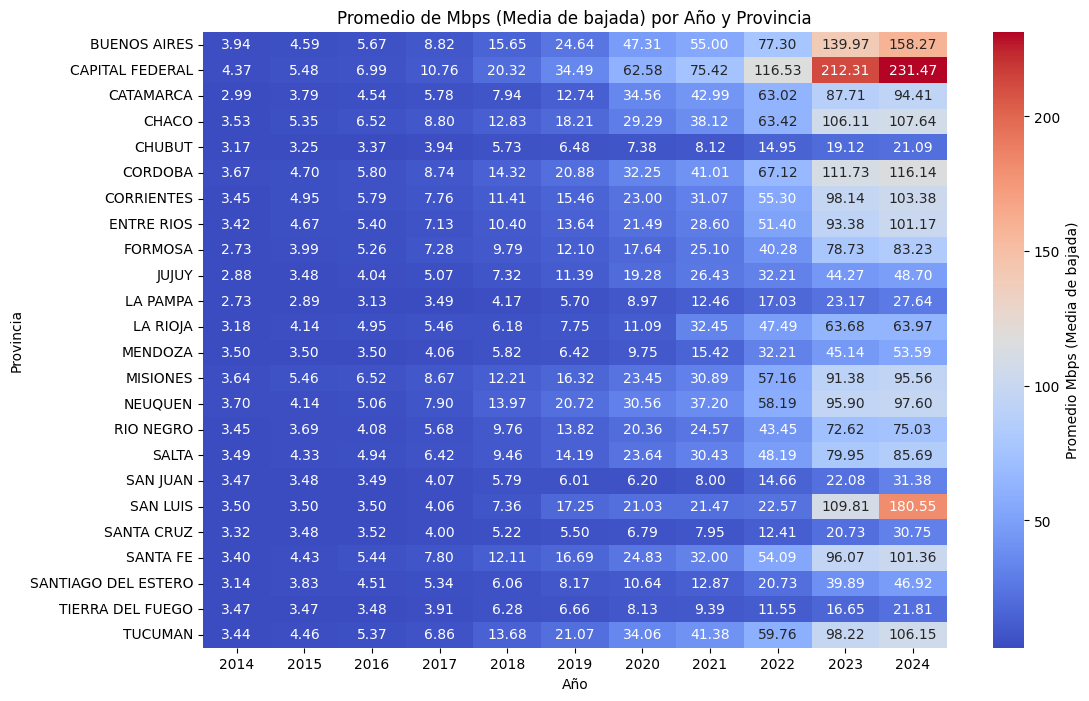

In [49]:
# Años en el eje X y las provincias en el eje Y
df_pivot = promedio_por_año_provincia.pivot(index='Provincia', columns='Año', values='Mbps (Media de bajada)')

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Promedio Mbps (Media de bajada)'})
plt.title('Promedio de Mbps (Media de bajada) por Año y Provincia')
plt.xlabel('Año')
plt.ylabel('Provincia')
plt.show()


#### Comportamiento de la velocidad, periodos trimestrales.

In [50]:
df_total_trimestre_anio = df_velocidad.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].sum().reset_index()
df_total_trimestre_anio.rename(columns={'Mbps (Media de bajada)': 'Total Mbps'}, inplace=True)
df_promedio_trimestre_anio = df_velocidad.groupby(['Año', 'Trimestre'])['Mbps (Media de bajada)'].mean().reset_index()
df_promedio_trimestre_anio.rename(columns={'Mbps (Media de bajada)': 'Promedio Mbps'}, inplace=True)
df_trimestre_anio = pd.merge(df_total_trimestre_anio, df_promedio_trimestre_anio, on=['Año', 'Trimestre'])
df_trimestre_anio.head()


,Año,Trimestre,Total Mbps,Promedio Mbps
0,2014,1,77.790826,3.241284
1,2014,2,80.055265,3.335636
2,2014,3,81.212936,3.383872
3,2014,4,87.321740,3.638406
4,2015,1,93.040200,3.876675


In [51]:
df_trimestre_anio.tail()

,Año,Trimestre,Total Mbps,Promedio Mbps
37,2023,2,1825.01,76.042083
38,2023,3,1886.63,78.609583
39,2023,4,2045.00,85.208333
40,2024,1,2064.85,86.035417
41,2024,2,2102.10,87.587500


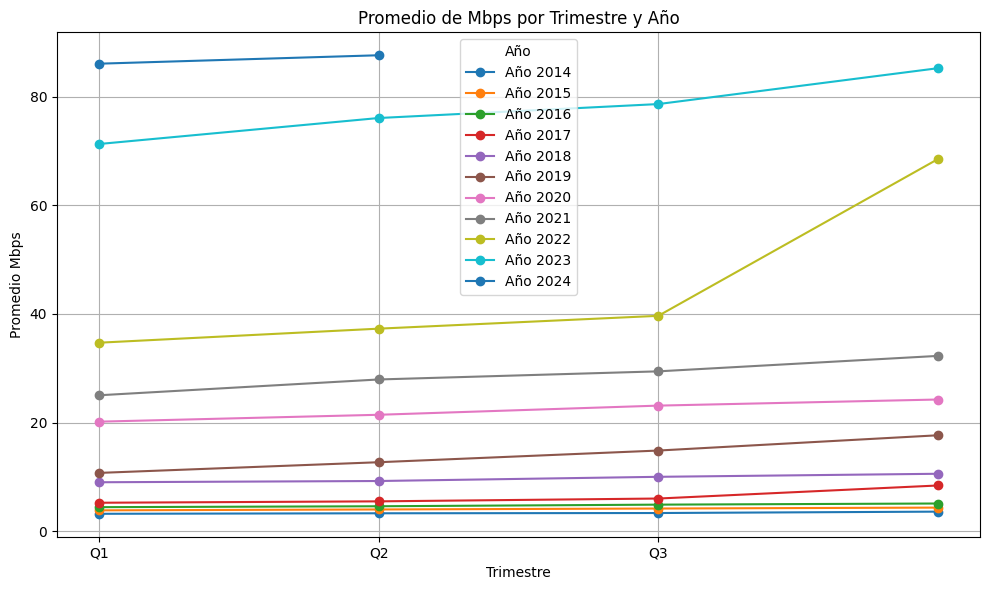

In [52]:
plt.figure(figsize=(10, 6))
for año in df_trimestre_anio['Año'].unique():
    df_año = df_trimestre_anio[df_trimestre_anio['Año'] == año]
    plt.plot(df_año['Trimestre'], df_año['Promedio Mbps'], marker='o', linestyle='-', label=f'Año {año}')

# Grafica
plt.title('Promedio de Mbps por Trimestre y Año')
plt.xlabel('Trimestre')
plt.ylabel('Promedio Mbps')
plt.xticks([1, 2, 3], ['Q1', 'Q2', 'Q3'])
plt.legend(title="Año")
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede observar que la velovidad promedio ha mejorado continuamente en la decada de estudio. El grafico generado es muy interesante porque se pueden ver los saltos en cada trimestre de cada año. Se puede observar que a medida que pasa el tiempo la velocidad de bajada siempre ha mejorado, no ha habido un solo año en el que haya habido un retroceso. En 2014 la velocidad de bajada promedio fue de 3.24 Mpbs, mientras que en 2022 alcanzó los 87.58 Mbps. 

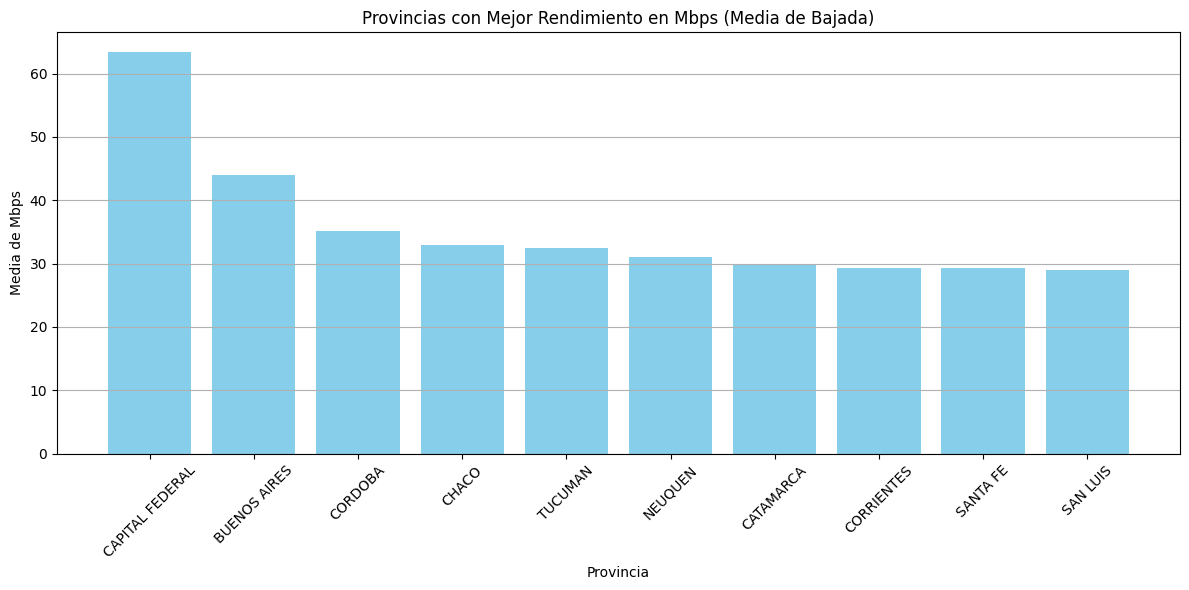

In [53]:
df_prov_rendimiento = df_velocidad.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()
df_prov_rendimiento = df_prov_rendimiento.sort_values(by='Mbps (Media de bajada)', ascending=False)
top_provincias = df_prov_rendimiento.head(10)

# Grafica
plt.figure(figsize=(12, 6))
plt.bar(top_provincias['Provincia'], top_provincias['Mbps (Media de bajada)'], color='skyblue')
plt.title('Provincias con Mejor Rendimiento en Mbps (Media de Bajada)')
plt.xlabel('Provincia')
plt.ylabel('Media de Mbps')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Las provincias con mejor velocidad de internet fueron: Capital Federal, Buenos Aires, Cordoba, Chaco, Tucumán, Neuquen, Catamarca, Corrientes, Santa Fe y San Luis, en orden descendente. 

### Velocidad media descargadada (VMD): 

Objetivos del EDA:
- Analizar tendencias en la velocidad media.
- Comparar la velocidad media con otros factores como la tecnología y la región.

In [54]:
df_VMP = pd.read_excel('Internet.xlsx', sheet_name='Totales VMD')
df_VMP.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [55]:
df_VMP.shape

(42, 4)

In [56]:
df_VMP.isnull().sum()

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

In [57]:
# Asegurarnos de que los datos estén ordenados por año y trimestre
df_VMP = df_VMP.sort_values(by=['Año', 'Trimestre'])


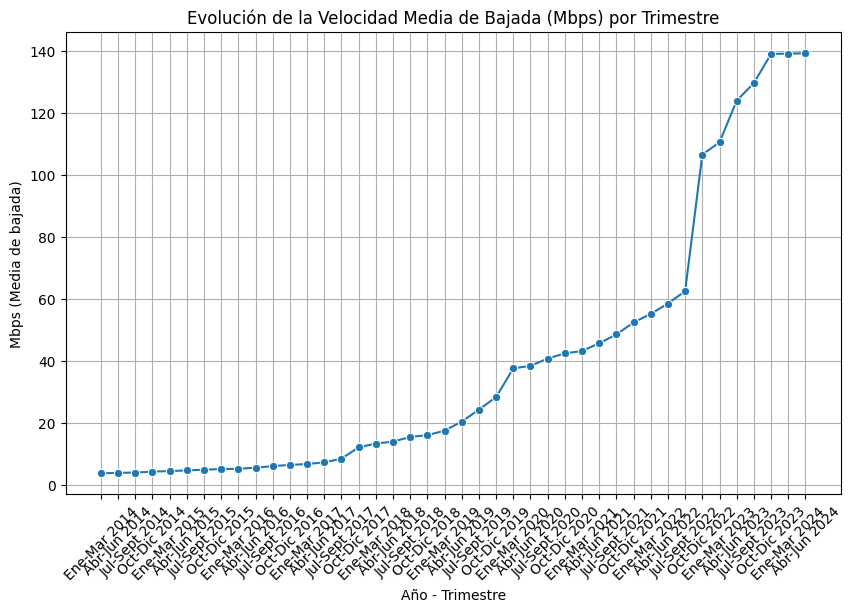

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la tendencia de Mbps (Media de bajada) por Año y Trimestre
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_VMP, x='Trimestre.1', y='Mbps (Media de bajada)', marker='o')
plt.title('Evolución de la Velocidad Media de Bajada (Mbps) por Trimestre')
plt.xlabel('Año - Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


En la anterior gráfica se puede observar el comportamiento de la velocidad media de bajada en función del tiempo, por año y por trimestre. La tendencia es clara, en la ultima década ha habido un crecimiento considerable de la velocidad media de descarga, el cual incrementó de manera progresiva hasta el primer trimestre de 2022, en el siguiente trimestre da un gran salto y sigue aumentando de forma considerable. 

In [59]:
df_VMP['Mbps (Media de bajada)'].describe()

count     42.000000
mean      39.334762
std       43.643195
min        3.617127
25%        6.038428
50%       18.855000
75%       51.370000
max      139.250000
Name: Mbps (Media de bajada), dtype: float64

Año
2014      3.849998
2015      4.668755
2016      5.695848
2017      8.532677
2018     14.595220
2019     22.537500
2020     39.717500
2021     47.385000
2022     70.642500
2023    125.790000
2024    139.200000
Name: Mbps (Media de bajada), dtype: float64


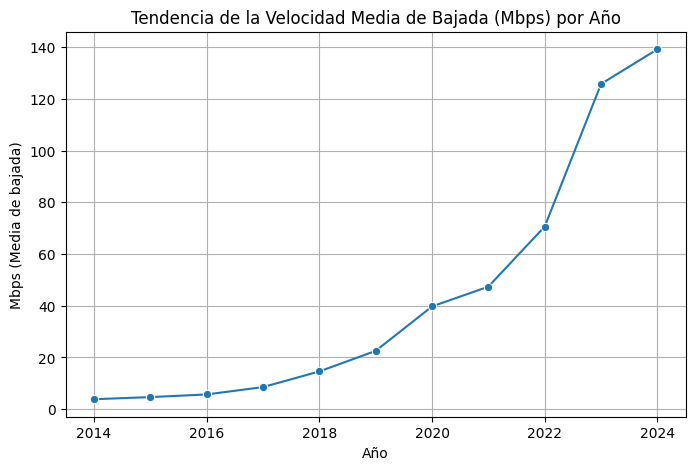

In [60]:
# Agrupar por Año y calcular la media de Mbps
tendencia_anual = df_VMP.groupby('Año')['Mbps (Media de bajada)'].mean()
print(tendencia_anual)

# Graficar la tendencia anual
plt.figure(figsize=(8, 5))
sns.lineplot(data=tendencia_anual, marker='o')
plt.title('Tendencia de la Velocidad Media de Bajada (Mbps) por Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.show()

La anterior gráfica confirma la tendencia anteriormente mencionada. 

### Penetración-poblacion y Penetracion-hogares: 

Objetivos del EDA:
- Evaluar la penetración de internet.
- Analizar cómo varía la penetración entre diferentes regiones y grupos demográficos.

In [61]:
df_poblacion = pd.read_excel('Internet.xlsx', sheet_name='Penetración-poblacion')
df_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [62]:
df_hogares = pd.read_excel('Internet.xlsx', sheet_name='Penetracion-hogares')
df_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [63]:
# Unir los datasets
df_poblacion_hogares = pd.merge(df_poblacion, df_hogares[['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares']], 
                                on=['Año', 'Trimestre', 'Provincia'], 
                                how='left')

df_poblacion_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,27.430000,79.840000
1,2024,2,Capital Federal,47.440000,116.370000
2,2024,2,Catamarca,17.500000,68.810000
3,2024,2,Chaco,11.780000,44.060000
4,2024,2,Chubut,26.460000,86.330000
...,...,...,...,...,...
995,2014,1,La Rioja,4.353175,16.294105
996,2014,1,Mendoza,8.933318,31.913123
997,2014,1,Misiones,6.323161,23.136539
998,2014,1,Neuquén,14.882266,49.791605


In [64]:
df_poblacion_hogares.describe()

,Año,Trimestre,Accesos por cada 100 hab,Accesos por cada 100 hogares
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2018.800000,2.464000,15.727248,52.794973
std,3.021445,1.114426,9.240063,24.135063
min,2014.000000,1.000000,2.723000,9.513970
25%,2016.000000,1.000000,9.018188,33.957657
50%,2019.000000,2.000000,13.674812,50.133004
75%,2021.000000,3.000000,20.323973,67.010861
max,2024.000000,4.000000,52.236739,124.061394


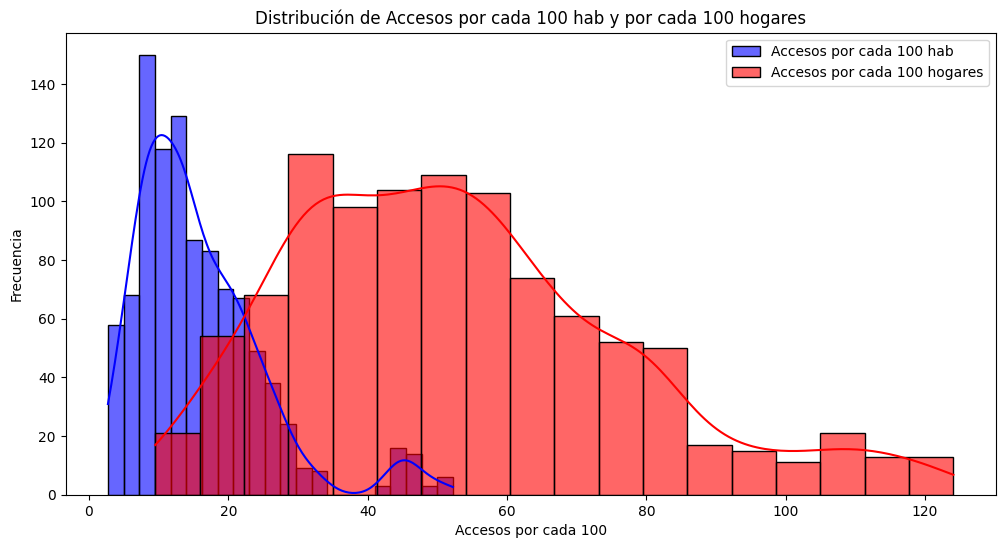

In [65]:
# Distribucoin comparativa. 
plt.figure(figsize=(12, 6))
sns.histplot(df_poblacion_hogares['Accesos por cada 100 hab'], kde=True, color='blue', label='Accesos por cada 100 hab', alpha=0.6)
sns.histplot(df_poblacion_hogares['Accesos por cada 100 hogares'], kde=True, color='red', label='Accesos por cada 100 hogares', alpha=0.6)
plt.title('Distribución de Accesos por cada 100 hab y por cada 100 hogares')
plt.xlabel('Accesos por cada 100')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Se puede interpretar que los accesos a internet por cada 100 hogares y por cada 100 habitantes no siguen el mismo patrón. El acceso por cada 100 hogares es notablemente mayor. 

C:\Users\anavi\AppData\Local\Temp\ipykernel_19796\3492951616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Provincia', y='Accesos por cada 100 hab', data=df_poblacion_hogares, palette='Blues')


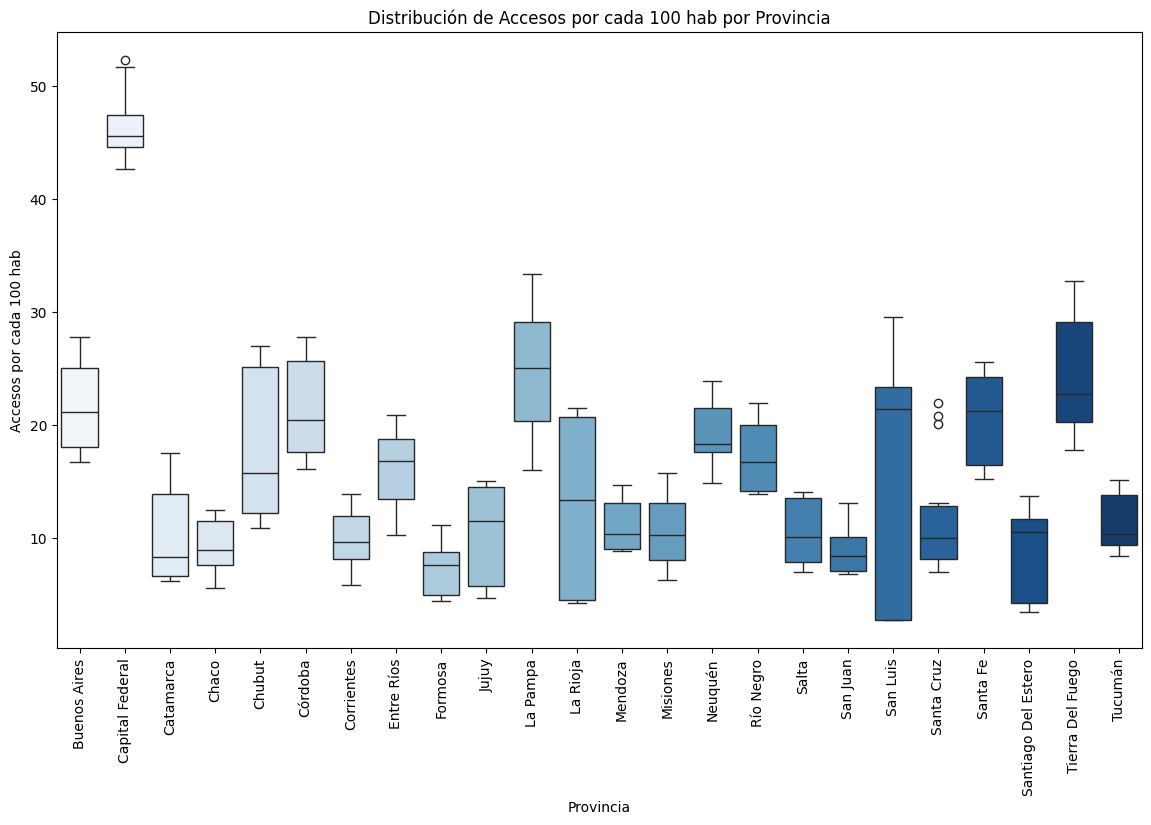

In [66]:
# Comparación de los accesos por provincia para habitantes
plt.figure(figsize=(14, 8))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hab', data=df_poblacion_hogares, palette='Blues')
plt.title('Distribución de Accesos por cada 100 hab por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=90)
plt.show()

Los datos relacionados con los accesos por cada 100 habitantes, por Provincia, no muestran una dispersión significativa; los datos dispersos se puede observar unicamente para la provincia de La Pamba y San Luis. 

C:\Users\anavi\AppData\Local\Temp\ipykernel_19796\3520700456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_poblacion_hogares, palette='Reds')


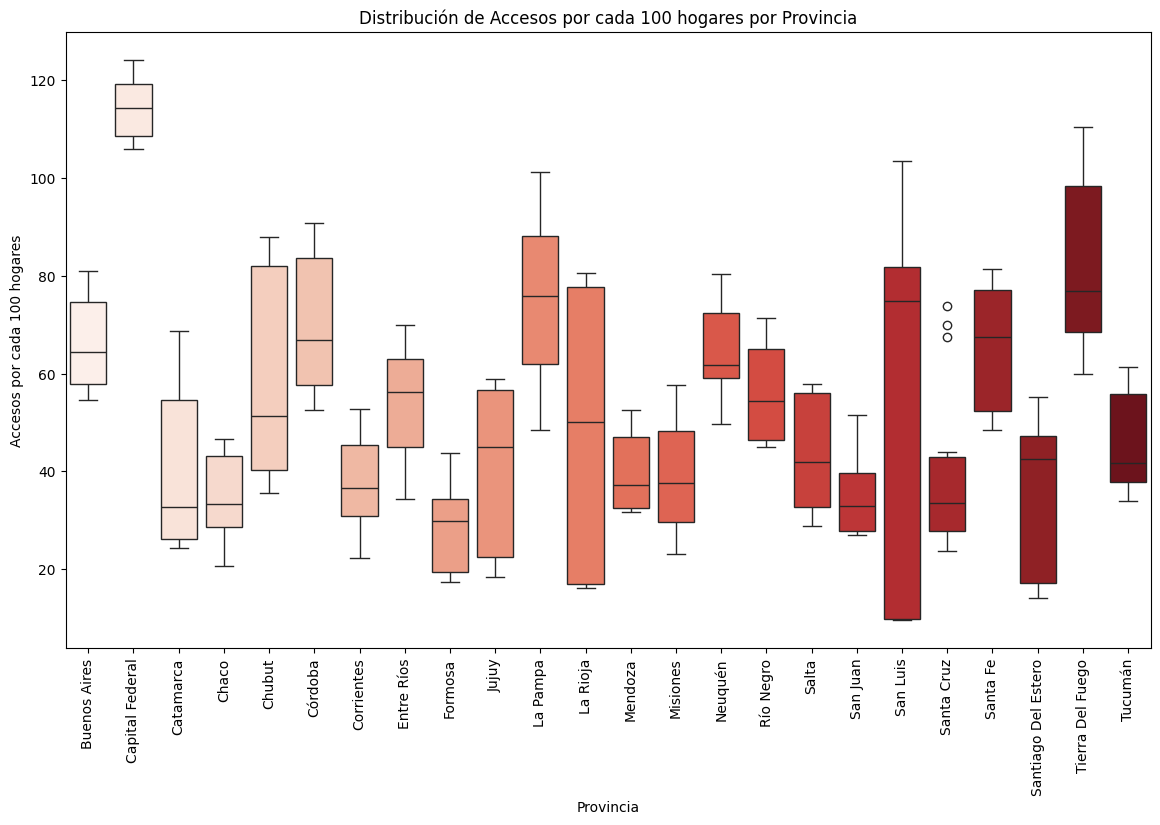

In [67]:
# Comparación de los accesos por provincia para hogares
plt.figure(figsize=(14, 8))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_poblacion_hogares, palette='Reds')
plt.title('Distribución de Accesos por cada 100 hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.show()

Los datos relacionados con los accesos por cada 100 hogares, por Provincia, no muestran una dispersión significativa; los datos dispersos se puede observar unicamente para la provincia de Catamarca, La Pamba y San Luis. 

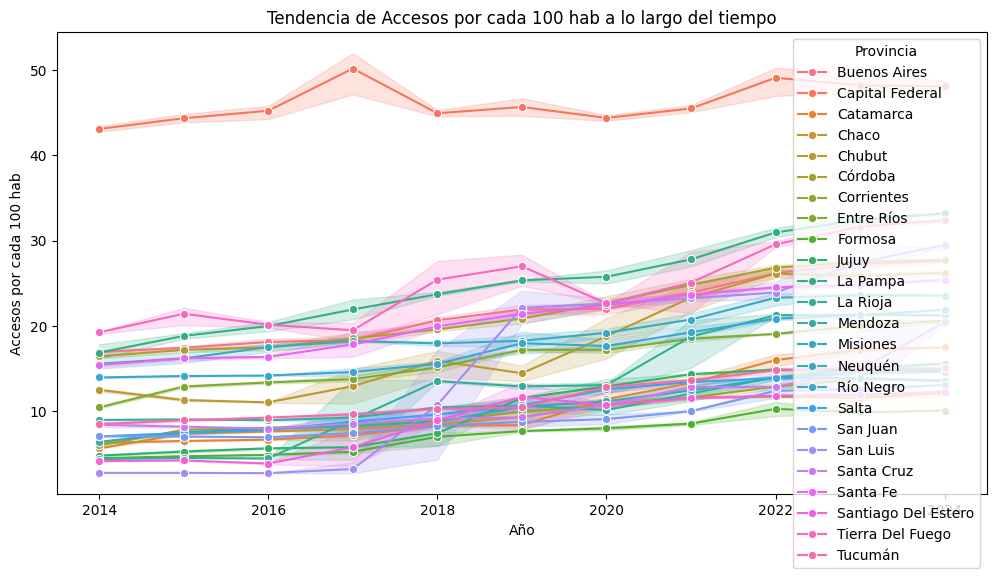

In [68]:
# tendencia de accesos por habitantes
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_poblacion_hogares, x='Año', y='Accesos por cada 100 hab', hue='Provincia', marker='o')
plt.title('Tendencia de Accesos por cada 100 hab a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.legend(title='Provincia')
plt.show()


Se puede observar un incremento en las tendencias de accesos por cada 100 habitantes durante el periodo de tiempo estudiado (2014 a 2024). Aunque si se observa un incremento, se podria decir que es muy ligero dado que las graficas en la mayoria de los casos tienden a ser planas. 

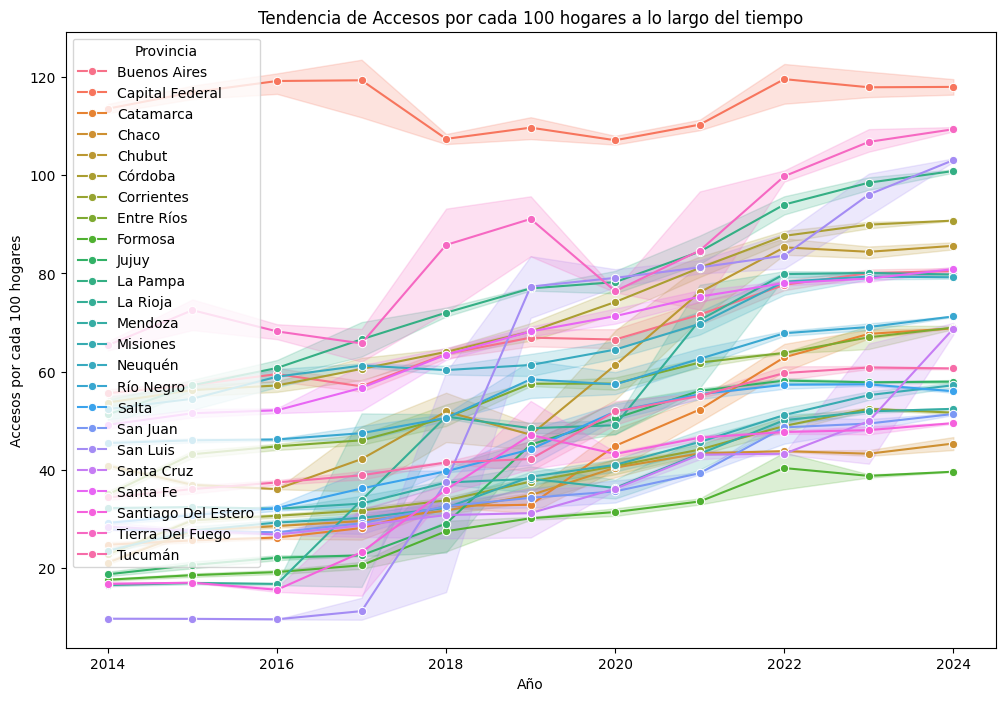

In [69]:
# tendencia de accesos hogares
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_poblacion_hogares, x='Año', y='Accesos por cada 100 hogares', hue='Provincia', marker='o')
plt.title('Tendencia de Accesos por cada 100 hogares a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia')
plt.show()

Se puede observar un incremento en las tendencias de accesos por cada 100 hogares durante el periodo de tiempo estudiado (2014 a 2024). Aunque en algunas de las provincias la tendencia no es exactamente en aumento, si se ve un aumento general. Aparentemente Capital federal tiene un comportamiento atipico, debido a que parece mantener el mismo promedio al inicio y final del periodo de evaluación pero hubo un leve decrecimiento intermedio. 

                              Accesos por cada 100 hab  \
Accesos por cada 100 hab                      1.000000   
Accesos por cada 100 hogares                  0.968979   

                              Accesos por cada 100 hogares  
Accesos por cada 100 hab                          0.968979  
Accesos por cada 100 hogares                      1.000000  


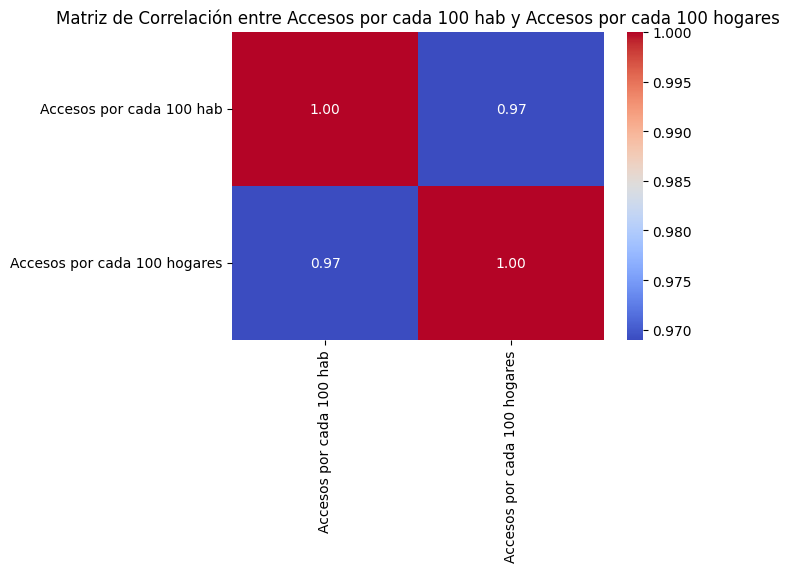

In [70]:
# Calculd de correlación 
correlacion = df_poblacion_hogares[['Accesos por cada 100 hab', 'Accesos por cada 100 hogares']].corr()
print(correlacion)

# Grafica
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Accesos por cada 100 hab y Accesos por cada 100 hogares')
plt.show()


El grafico arroja una correlación entre 0.97 y 1.00 por lo tanto se puede decir que existe una correlación perfecta entre el acceso por cada 100 habitantes y el acceso por cada 100 hogares. 

### Ingresos

Objetivos del EDA:
- Distribución de Ingresos: Examinar cómo están distribuidos los ingresos en diferentes regiones o períodos de tiempo.
- Tendencias Temporales: Analizar cómo han cambiado los ingresos a lo largo del tiempo.

In [71]:
df_ingresos = pd.read_excel('Internet.xlsx', sheet_name='Ingresos ')
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


In [72]:
df_ingresos.isnull().sum() # Para identificar si hay valores nulos

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [73]:
df_ingresos['Ingresos (millones de pesos)'] = df_ingresos['Ingresos (miles de pesos)'] / 1000

In [74]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos (millones de pesos)
0,2024,2,4.420322e+08,Abr-Jun 2024,442032.16669
1,2024,1,3.461990e+08,Ene-Mar 2024,346198.98613
2,2023,4,1.673760e+08,Oct-Dic 2023,167376.01480
3,2023,3,1.331066e+08,Jul-Sept 2023,133106.59341
4,2023,2,1.180603e+08,Jun-Mar 2023,118060.28028


In [75]:
df_ingresos = df_ingresos.drop(['Ingresos (miles de pesos)', 'Periodo'], axis=1)

In [76]:
df_ingresos.head()

,Año,Trimestre,Ingresos (millones de pesos)
0,2024,2,442032.16669
1,2024,1,346198.98613
2,2023,4,167376.01480
3,2023,3,133106.59341
4,2023,2,118060.28028


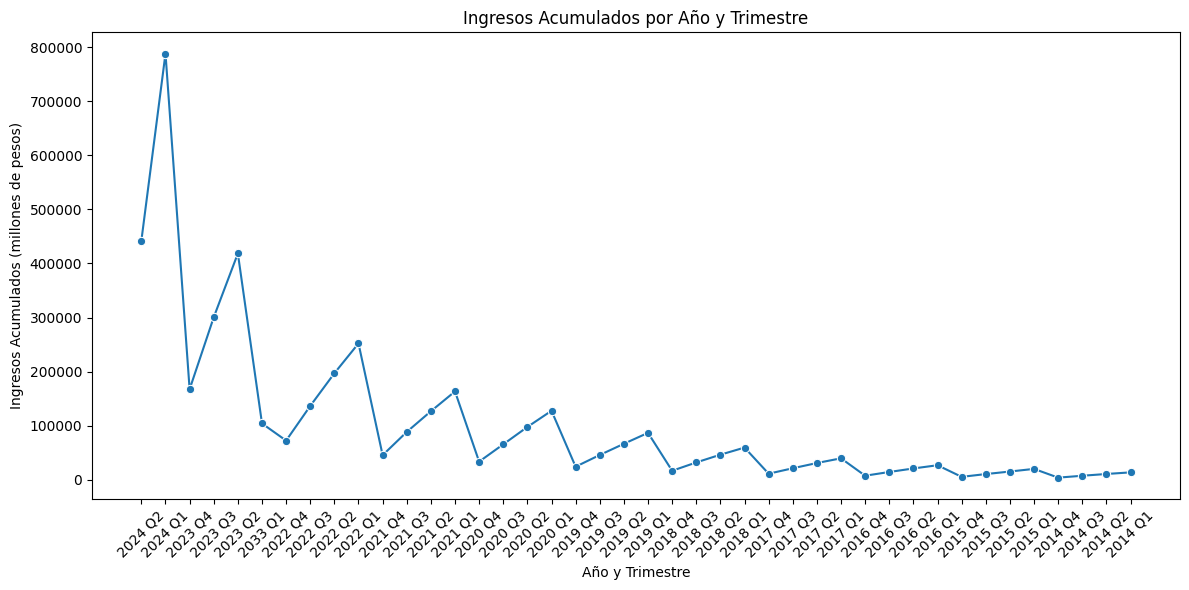

In [77]:
df_ingresos['Ingresos acumulados'] = df_ingresos.groupby('Año')['Ingresos (millones de pesos)'].cumsum()
df_ingresos['Año_Trimestre'] = df_ingresos['Año'].astype(str) + ' Q' + df_ingresos['Trimestre'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ingresos, x='Año_Trimestre', y='Ingresos acumulados', marker='o')
plt.title('Ingresos Acumulados por Año y Trimestre')
plt.xlabel('Año y Trimestre')
plt.ylabel('Ingresos Acumulados (millones de pesos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se puede ver una tendencia clara en el aumento del ingreso pero seria mejor hacerlo de manera anual.

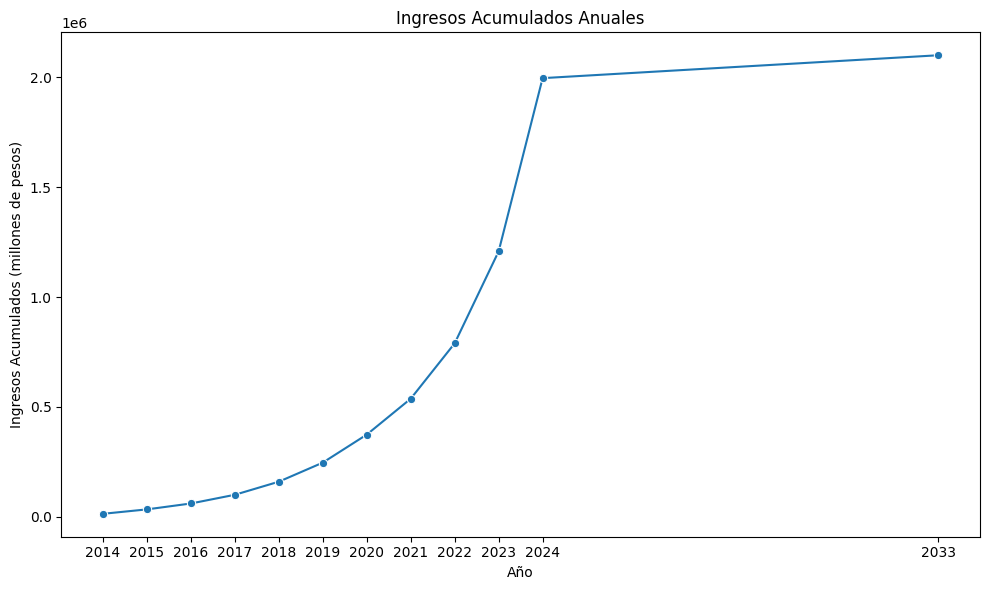

In [78]:
df_ingresos_anual = df_ingresos.groupby('Año')['Ingresos (millones de pesos)'].sum().cumsum().reset_index()
df_ingresos_anual = df_ingresos_anual.sort_values(by='Año')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ingresos_anual, x='Año', y='Ingresos (millones de pesos)', marker='o')
plt.title('Ingresos Acumulados Anuales')
plt.xlabel('Año')
plt.ylabel('Ingresos Acumulados (millones de pesos)')
plt.xticks(df_ingresos_anual['Año'])
plt.tight_layout()
plt.show()

Se evidencia un error en los datos que debo corregir. Hay información del año 2033, debe ser un error al ingresar los datos.

In [79]:
df_ingresos[df_ingresos['Año'] == 2033]

,Año,Trimestre,Ingresos (millones de pesos),Ingresos acumulados,Año_Trimestre
5,2033,1,104134.99281,104134.99281,2033 Q1


In [80]:
df_ingresos[df_ingresos['Año'] == 2023] # Quiero confirmar que la información que aparece de 2033 es de 2023. 

,Año,Trimestre,Ingresos (millones de pesos),Ingresos acumulados,Año_Trimestre
2,2023,4,167376.01480,167376.01480,2023 Q4
3,2023,3,133106.59341,300482.60821,2023 Q3
4,2023,2,118060.28028,418542.88849,2023 Q2


In [81]:
df_ingresos['Año'] = df_ingresos['Año'].replace(2033, 2023) # reemplazo el año para corregir el error

In [82]:
df_ingresos[df_ingresos['Año'] == 2023] # confirmo el cambio. 

,Año,Trimestre,Ingresos (millones de pesos),Ingresos acumulados,Año_Trimestre
2,2023,4,167376.01480,167376.01480,2023 Q4
3,2023,3,133106.59341,300482.60821,2023 Q3
4,2023,2,118060.28028,418542.88849,2023 Q2
5,2023,1,104134.99281,104134.99281,2033 Q1


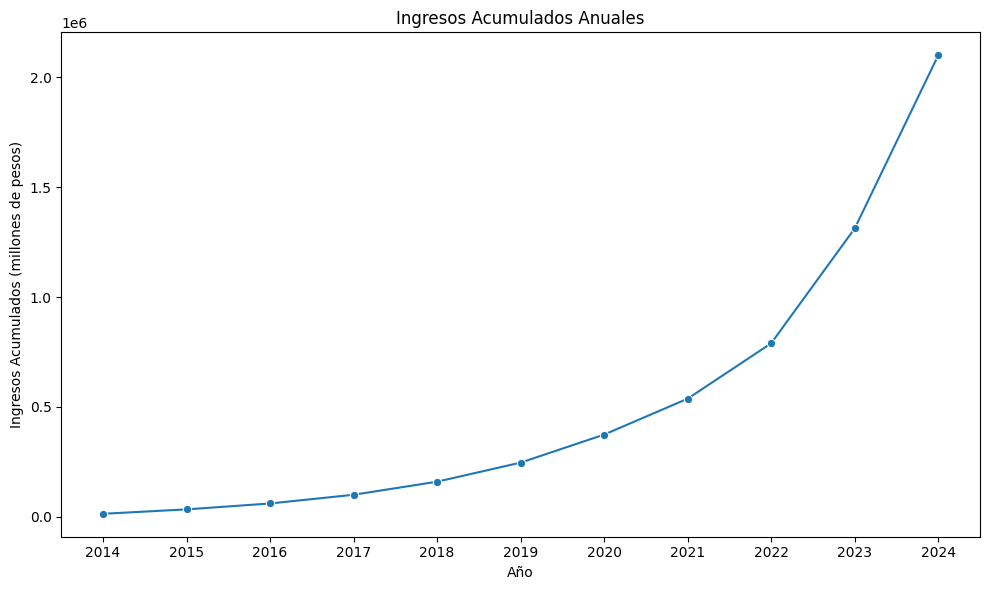

In [83]:
# Vuelvo a elaborar la gráfica de ingresos acumulados para confirmar que no haya un outlier de nuevo. 
df_ingresos_anual = df_ingresos.groupby('Año')['Ingresos (millones de pesos)'].sum().cumsum().reset_index()
df_ingresos_anual = df_ingresos_anual.sort_values(by='Año')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ingresos_anual, x='Año', y='Ingresos (millones de pesos)', marker='o')
plt.title('Ingresos Acumulados Anuales')
plt.xlabel('Año')
plt.ylabel('Ingresos Acumulados (millones de pesos)')
plt.xticks(df_ingresos_anual['Año'])
plt.tight_layout()
plt.show()

In [84]:
# Quiero ver el porcentaje del ingreso con respecto al ultimo año.
ultimo_ingreso = df_ingresos_anual['Ingresos (millones de pesos)'].iloc[-1]
df_ingresos_anual['Porcentaje/último año'] = (df_ingresos_anual['Ingresos (millones de pesos)'] / ultimo_ingreso) * 100
df_ingresos_anual


,Año,Ingresos (millones de pesos),Porcentaje/último año
0,2014,1.368395e+04,0.651402
1,2015,3.379276e+04,1.608649
2,2016,6.066027e+04,2.887632
3,2017,1.003322e+05,4.776152
4,2018,1.598718e+05,7.610436
5,2019,2.466444e+05,11.741100
6,2020,3.742302e+05,17.814614
7,2021,5.376141e+05,25.592235
8,2022,7.897832e+05,37.596330
9,2023,1.312461e+06,62.477551


Como se puede observar en las anteriores gráficas, hay una tendencia clara de incremento del ingreso, que se acentúa entre el año 2021 y 2024. De acuerdo con la información arrojada por la tabla, el ingreso creció casi en un 100%, dado que pasó de 13,683.95 millones de pesos (0,65%) a 2,100,692 (100%)